In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import string
import networkx as nx
#from strategies.ThirdStrategy import ThirdStrategy


In [3]:
# Función para generar la matriz con números aleatorios entre 0 y 1
def generar_matriz(n, m):
    matriz = []
    for i in range(n):
        fila = [round(random.uniform(0, 1), 2) for _ in range(m)]  # Redondear a 2 decimales
        matriz.append(fila)
    return matriz

# Generar una matriz 4x4 como ejemplo
n = 3  # Número de filas
m = 4  # Número de columnas
matriz = generar_matriz(n, m)
matriz


[[0.25, 0.21, 0.83, 0.0], [0.72, 0.73, 0.72, 0.74], [0.65, 0.48, 0.88, 0.86]]

In [4]:
# Función para generar las etiquetas de las filas (A, B, C, D, ...)
def generar_etiquetas_filas(n):
    return list(string.ascii_uppercase[:n])  # Genera etiquetas A, B, C, D, etc.

# Función para generar las etiquetas de las columnas (A', B', C', D', ...)
def generar_etiquetas_columnas(m):
    return [f"{letter}'" for letter in string.ascii_uppercase[:m]]  # Genera etiquetas A', B', C', D', etc.

# Generar automáticamente las etiquetas para filas y columnas
filas = generar_etiquetas_filas(n)
columnas = generar_etiquetas_columnas(m)

filas, columnas


(['A', 'B', 'C'], ["A'", "B'", "C'", "D'"])

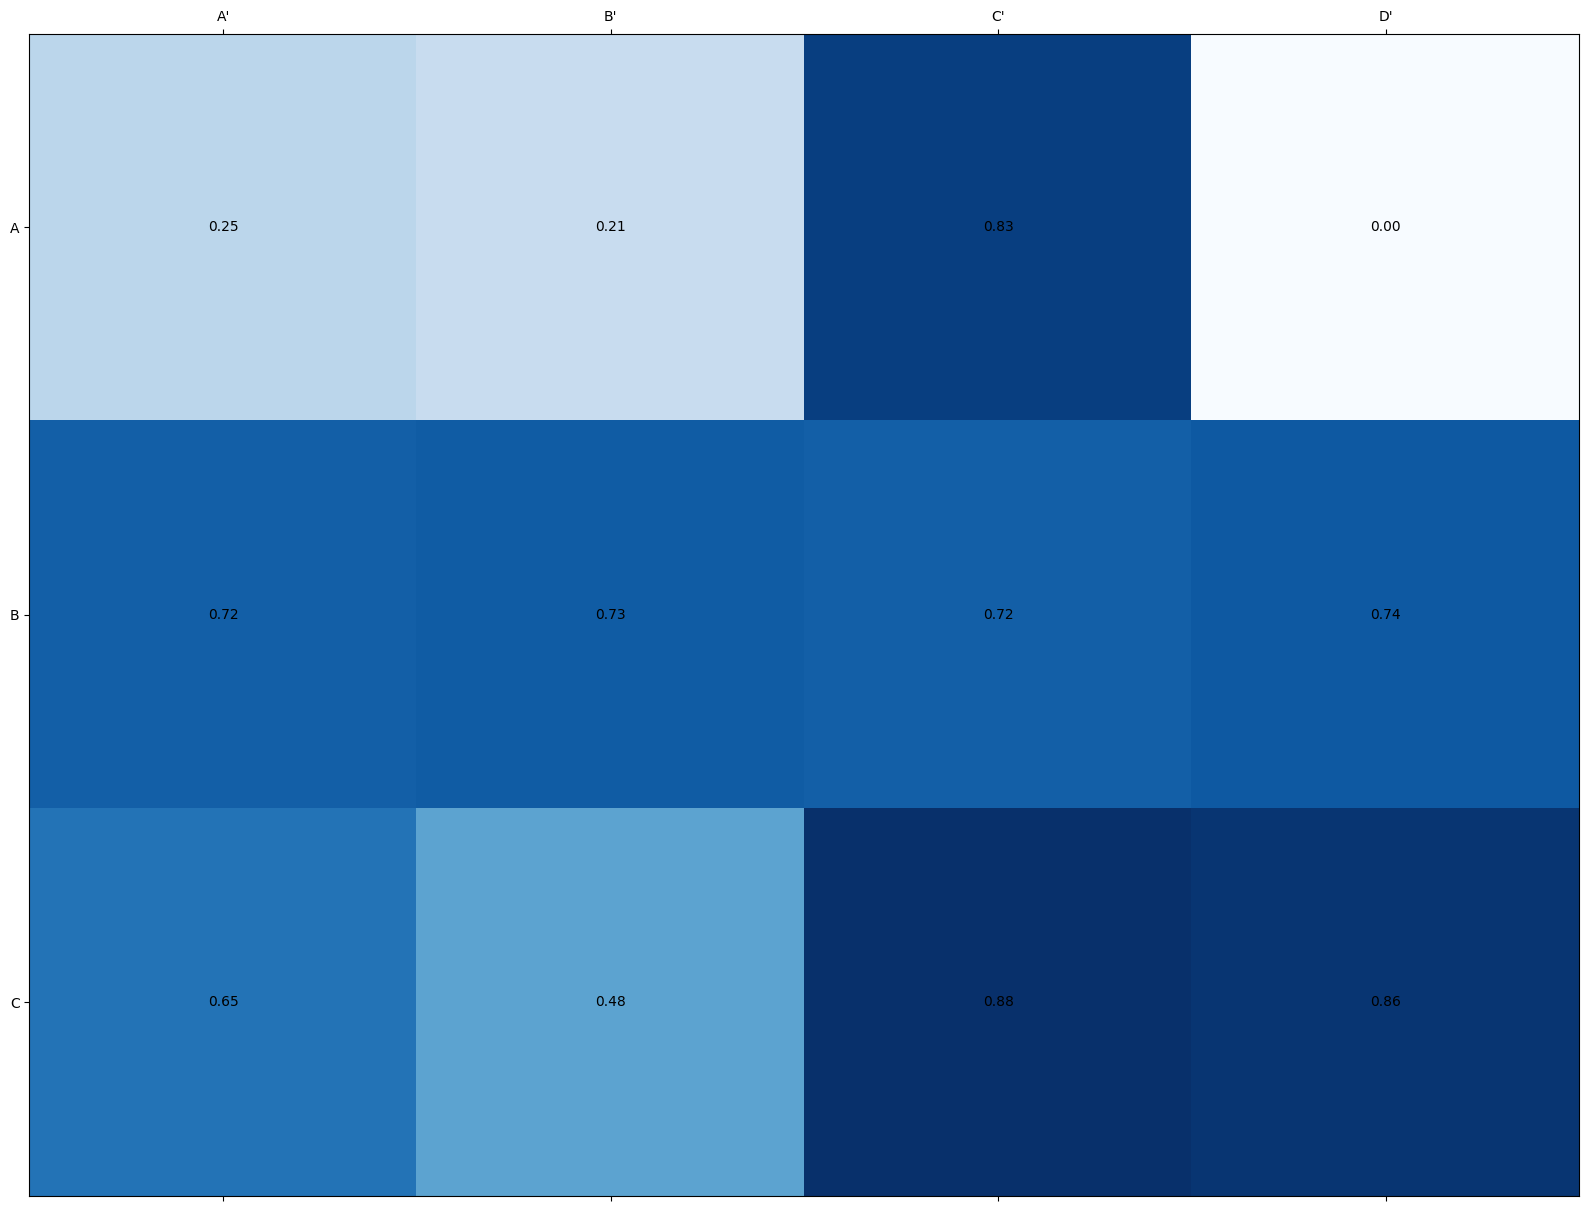

In [5]:
# Crear la gráfica de la matriz
fig, ax = plt.subplots(figsize=(20, 20))

# Usar imshow para visualizar la matriz sin la barra de colores
ax.matshow(np.array(matriz), cmap="Blues")

# Agregar las etiquetas de las filas y las columnas
ax.set_xticks(np.arange(m))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(columnas)
ax.set_yticklabels(filas)

# Colocar los valores de la matriz sobre cada celda
for i in range(n):
    for j in range(m):
        ax.text(j, i, f'{matriz[i][j]:.2f}', ha='center', va='center', color='black')

# Quitar la barra de colores
fig.colorbar(ax.matshow(np.array(matriz), cmap="Blues")).remove()

# Mostrar la gráfica
plt.show()


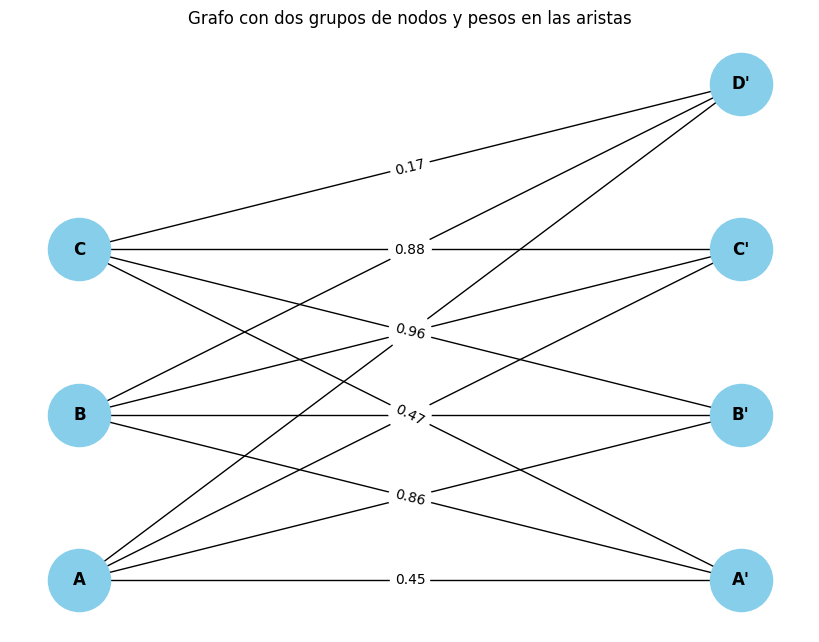

In [25]:
# Crear el grafo
G = nx.Graph()

# Agregar los nodos para las filas (A, B, C...)
for fila in filas:
    G.add_node(fila)

# Agregar los nodos para las columnas (A', B', C'...)
for columna in columnas:
    G.add_node(columna)

# Agregar las aristas con los pesos de la matriz
for i, fila in enumerate(filas):
    for j, columna in enumerate(columnas):
        peso = matriz[i][j]
        G.add_edge(fila, columna, weight=peso)

# Posiciones de los nodos para que los nodos de filas estén en un lado y los de columnas en el otro
pos = {}
for i, fila in enumerate(filas):
    pos[fila] = (0, i)  # Colocamos las filas en el eje x = 0
for i, columna in enumerate(columnas):
    pos[columna] = (1, i)  # Colocamos las columnas en el eje x = 1

# Dibujar el grafo
plt.figure(figsize=(8, 6))

# Dibujar los nodos y las aristas
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold')

# Dibujar los pesos de las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo con dos grupos de nodos y pesos en las aristas")
plt.show()


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Función para generar la matriz con números aleatorios
def generar_matriz(n, m):
    matriz = []
    for i in range(n):
        fila = [round(random.uniform(0, 1), 2) for _ in range(m)]  # Redondear a 2 decimales
        matriz.append(fila)
    return matriz

# Parámetros del ACO
n = 4  # Número de filas (puntos/nodos)
m = 4  # Número de columnas (dimensiones)

# Definir la matriz de distancias
matriz = generar_matriz(n, m)

# Número de hormigas
num_hormigas = 10
# Número de iteraciones
num_iteraciones = 100
# Parámetros del ACO
evaporacion = 0.5  # Factor de evaporación
peso_feromona = 1.0  # Peso de la feromona
peso_distancia = 1.0  # Peso de la distancia en la probabilidad

# Inicializar feromonas en todas las rutas (matriz de feromonas)
feromonas = np.ones((n, m)) * 0.1  # Feromonas iniciales

# Función de probabilidad para elegir la siguiente ciudad
def probabilidad_traslado(actual, siguiente):
    denominador = 0
    for j in range(m):
        denominador += (feromonas[actual][j] ** peso_feromona) * ((1 / matriz[actual][j]) ** peso_distancia)
        #f(x)^pesoFeromona*(1/f(x)^peso distancia
    
    numerador = (feromonas[actual][siguiente] ** peso_feromona) * ((1 / matriz[actual][siguiente]) ** peso_distancia)
    return numerador / denominador

# Función de ACO
def aco():
    mejores_rutas = []
    mejor_costo = float('inf')
    
    for iteracion in range(num_iteraciones):
        rutas = []  # Rutas de las hormigas
        costos = []  # Costos de las rutas de las hormigas
        
        # Generación de rutas por cada hormiga
        for hormiga in range(num_hormigas):
            ruta = [random.randint(0, n-1)]  # Empezar en una ciudad aleatoria
            while len(ruta) < n:
                actual = ruta[-1]
                probabilidades = [probabilidad_traslado(actual, siguiente) for siguiente in range(m)]
                siguiente = np.random.choice(range(m), p=probabilidades)  # Elige la siguiente ciudad según la probabilidad
                ruta.append(siguiente)
            
            # Calcular el costo de la ruta
            costo = sum(matriz[ruta[i]][ruta[i+1]] for i in range(len(ruta)-1))
            rutas.append(ruta)
            costos.append(costo)
            
            # Actualizar el mejor costo y mejor ruta
            if costo < mejor_costo:
                mejor_costo = costo
                mejores_rutas = ruta
        
        # Evaporación de las feromonas
        feromonas *= (1 - evaporacion)
        
        # Depósito de feromonas por parte de las hormigas
        for i in range(num_hormigas):
            for j in range(len(rutas[i])-1):
                feromonas[rutas[i][j]][rutas[i][j+1]] += peso_feromona / costos[i]
        
    return mejores_rutas, mejor_costo

# Ejecutar el algoritmo ACO
mejor_ruta, mejor_costo = aco()

print(f"Mejor ruta encontrada: {mejor_ruta}")
print(f"Mejor costo: {mejor_costo}")


UnboundLocalError: cannot access local variable 'feromonas' where it is not associated with a value